In [16]:
# kaggle_Interests_group.csv/kaggle_Interests_group.csv
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering


In [2]:
path =  "kaggle_Interests_group/kaggle_Interests_group.csv"
dataset = pd.read_csv(path)

In [3]:
dataset.head()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN


In [4]:
dataset.isnull().sum()

group                     0
grand_tot_interests       0
interest1              5347
interest2              6339
interest3              6305
                       ... 
interest213            6338
interest214            6268
interest215            1397
interest216            2282
interest217            6193
Length: 219, dtype: int64

In [5]:
dataset.dtypes

group                   object
grand_tot_interests      int64
interest1              float64
interest2              float64
interest3              float64
                        ...   
interest213            float64
interest214            float64
interest215            float64
interest216            float64
interest217            float64
Length: 219, dtype: object

In [6]:
# SElecting numerical columns 
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
numeric_data = dataset[numeric_columns]

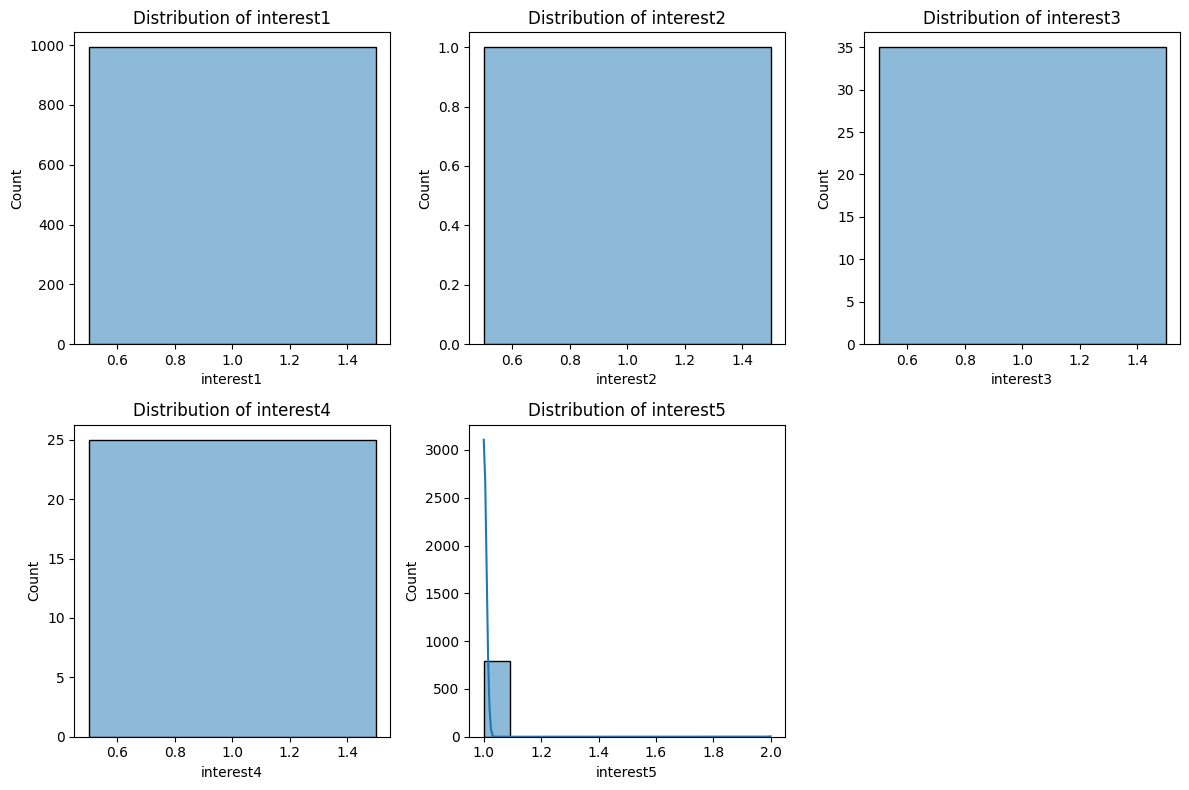

In [7]:
features_to_plot = ['interest1', 'interest2', 'interest3', 'interest4', 'interest5']

# Plot the distribution of selected features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(dataset[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

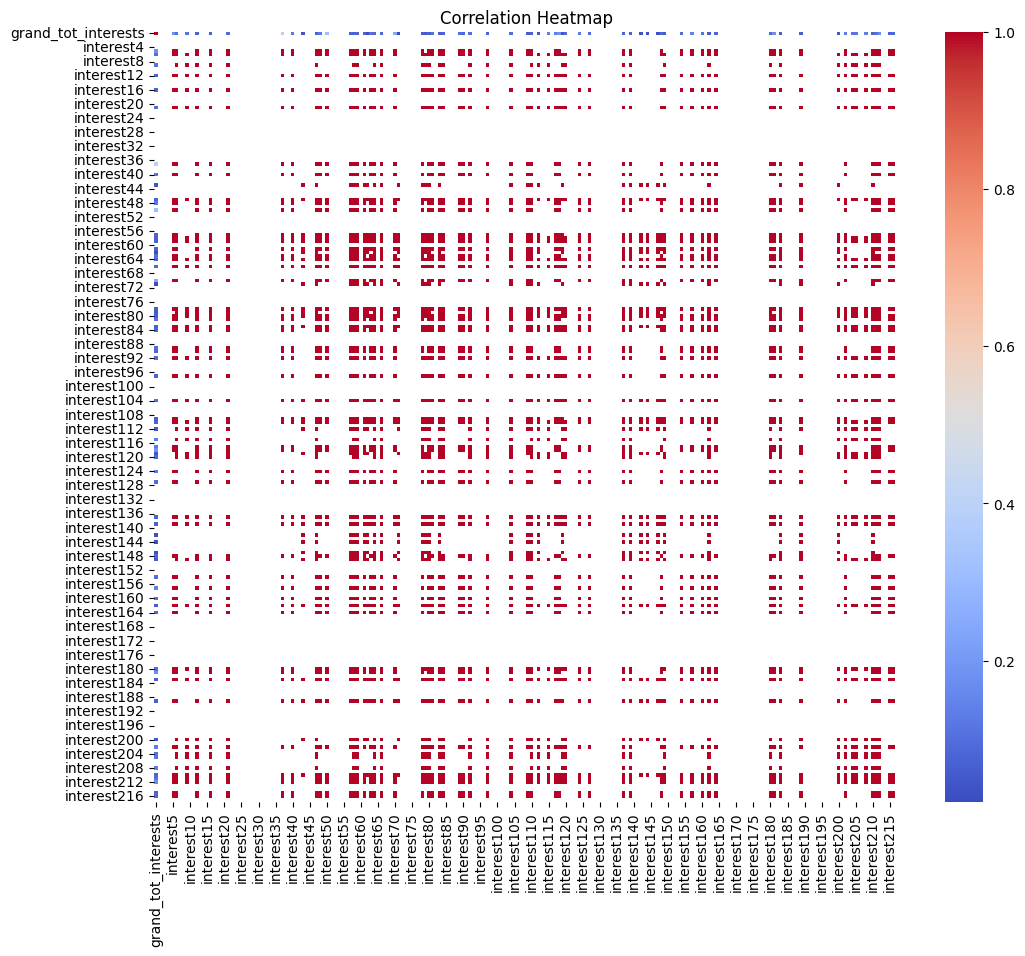

In [9]:
numeric_data_for_corr = dataset.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_data_for_corr.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

This literally does not make sense, I;ll probably delete it

In [11]:
# Putting the mean values in the nan valkues
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(numeric_data)

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

In [25]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Add cluster labels to the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['KMeans_Cluster'] = KMeans.predict(scaled_data)
pca_df['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_data)


TypeError: _BaseKMeans.predict() missing 1 required positional argument: 'X'

In [ ]:
ScaledDataFrame = pd.DataFrame(scaled_data, columns=numeric_columns)

In [ ]:
train_data, temp_data = train_test_split(ScaledDataFrame, test_size=0.4, random_state=42)
eval_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)
